In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# Load vectors from dict
def load_vectors_as_dict(path):
    vectors = {}
    with open(path, 'r', encoding="utf8") as f:
        line = f.readline()
        while line:
            # Split on white spaces
            line = line.strip().split(' ')
            if len(line) > 2:
                vectors[line[0]] = np.array([float(l) for l in line[1:]], dtype=np.float32)
            line = f.readline()
    return vectors

In [3]:
vocab_list=load_vectors_as_dict("data/glove.840B.300d.txt")

In [4]:
from numpy import dot
from numpy.linalg import norm

def coseno(a,b):
    result = np.dot(a, b) / (norm(a) * norm(b))
    return (result)

In [83]:
coseno(vocab_list["red"],vocab_list["blue"])

0.8438412

In [82]:
coseno(vocab_list["book"],vocab_list["computer"])

0.25407723

In [5]:
coseno(vocab_list["cat"],vocab_list["dog"])

0.80168545

In [6]:
coseno(vocab_list["sleeps"],vocab_list["runs"])

0.30534595

In [7]:
coseno(vocab_list["appropriate"],vocab_list["institution"])

0.45808432

In [8]:
d1 = "Obama speaks to the media in Illinois"
d2 = "The president greets the press in Chicago"

vect = CountVectorizer(stop_words="english").fit([d1, d2])
print("Features:",  ", ".join(vect.get_feature_names_out()))

Features: chicago, greets, illinois, media, obama, president, press, speaks


In [9]:
from scipy.spatial.distance import cosine
v_1, v_2 = vect.transform([d1, d2])
v_1 = v_1.toarray().ravel()
v_2 = v_2.toarray().ravel()
print(v_1, v_2)
print("cosine(doc_1, doc_2) = {:.2f}".format(cosine(v_1, v_2)))

[0 0 1 1 1 0 0 1] [1 1 0 0 0 1 1 0]
cosine(doc_1, doc_2) = 1.00


In [10]:
from sklearn.metrics import euclidean_distances
W_ = [vocab_list[w] for w in vect.get_feature_names_out()]
D_ = euclidean_distances(W_)
print("d(addresses, speaks) = {:.2f}".format(D_.min()))
print("d(addresses, chicago) = {:.2f}".format(D_[0, 1]))

d(addresses, speaks) = 0.00
d(addresses, chicago) = 8.51


In [11]:
vect.get_feature_names_out()

array(['chicago', 'greets', 'illinois', 'media', 'obama', 'president',
       'press', 'speaks'], dtype=object)

In [12]:
m_earth=pd.DataFrame(D_,index=vect.get_feature_names_out(),columns=vect.get_feature_names_out())
m_earth

,chicago,greets,illinois,media,obama,president,press,speaks
chicago,0.000000,8.514467,4.375242,8.483689,7.306151,8.955236,7.941274,8.309946
greets,8.514467,0.000000,9.114758,8.585093,8.492863,7.927308,7.686387,6.039039
illinois,4.375242,9.114758,0.000000,9.421333,7.967785,9.297634,8.685913,8.867826
media,8.483689,8.585093,9.421333,0.000000,8.318774,8.073079,6.016829,7.338174
obama,7.306151,8.492863,7.967785,8.318774,0.000000,7.597938,8.199607,7.857647
president,8.955236,7.927308,9.297634,8.073079,7.597938,0.000000,7.496166,6.819070
press,7.941274,7.686387,8.685913,6.016829,8.199607,7.496166,0.000000,6.814386
speaks,8.309946,6.039039,8.867826,7.338174,7.857647,6.819070,6.814386,0.000000


In [13]:
n_p=pd.DataFrame(np.triu(m_earth.values,1),index=vect.get_feature_names_out(),columns=vect.get_feature_names_out())
n_p

,chicago,greets,illinois,media,obama,president,press,speaks
chicago,0.0,8.514467,4.375242,8.483689,7.306151,8.955236,7.941274,8.309946
greets,0.0,0.000000,9.114758,8.585093,8.492863,7.927308,7.686387,6.039039
illinois,0.0,0.000000,0.000000,9.421333,7.967785,9.297634,8.685913,8.867826
media,0.0,0.000000,0.000000,0.000000,8.318774,8.073079,6.016829,7.338174
obama,0.0,0.000000,0.000000,0.000000,0.000000,7.597938,8.199607,7.857647
president,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.496166,6.819070
press,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.814386
speaks,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
n_p.max().sum()

62.39479

In [15]:
import pyemd

In [16]:
from pyemd import emd
from pyemd import emd_with_flow

# pyemd needs double precision input
v_1 = v_1.astype(np.double)
v_2 = v_2.astype(np.double)
v_1 /= v_1.sum()
v_2 /= v_2.sum()
D_ = D_.astype(np.double)
D_ /= D_.max()  # just for comparison purposes
print("d(doc_1, doc_2) = {:.2f}".format(emd(v_1, v_2, D_)))

d(doc_1, doc_2) = 0.64


In [17]:
print(vect.get_feature_names_out())
v1_=pd.DataFrame(v_1,index=vect.get_feature_names_out())
v2_=pd.DataFrame(v_2,index=vect.get_feature_names_out())
pd.concat([v1_,v2_],axis=1).T

['chicago' 'greets' 'illinois' 'media' 'obama' 'president' 'press'
 'speaks']


,chicago,greets,illinois,media,obama,president,press,speaks
0,0.00,0.00,0.25,0.25,0.25,0.00,0.00,0.25
0,0.25,0.25,0.00,0.00,0.00,0.25,0.25,0.00


In [79]:
def getWDM(d1,d2):
    vect = CountVectorizer(stop_words="english").fit([d1, d2])
    v_1, v_2 = vect.transform([d1, d2])
    v_1 = v_1.toarray().ravel()
    v_2 = v_2.toarray().ravel()
    W_=[]
    for w in vect.get_feature_names_out():
        if w in vocab_list:
            v=vocab_list[w]
            W_.append(v)
        else:
            v=np.zeros((1,300), dtype=np.float32)[0]
            W_.append(v)
    D_ = euclidean_distances(W_)
    print(v_1)
    v_1 = v_1.astype(np.double)
    v_2 = v_2.astype(np.double)
    v_1 /= v_1.sum()
    v_2 /= v_2.sum()
    D_ = D_.astype(np.double)
    D_ /= D_.max()  # just for comparison purposes
    return emd_with_flow(v_1, v_2, D_)#emd(v_1, v_2, D_),

In [80]:
print(vect.get_feature_names_out())
emd_,flujo=getWDM(d1,d2)

['chicago' 'greets' 'illinois' 'media' 'obama' 'president' 'press'
 'speaks']
[0 0 1 1 1 0 0 1]


In [81]:
emd_

0.63762325

In [21]:
pd.DataFrame(flujo,index=vect.get_feature_names_out(),columns=vect.get_feature_names_out())

,chicago,greets,illinois,media,obama,president,press,speaks
chicago,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
greets,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
illinois,0.25,0.00,0.0,0.0,0.0,0.00,0.00,0.0
media,0.00,0.00,0.0,0.0,0.0,0.00,0.25,0.0
obama,0.00,0.00,0.0,0.0,0.0,0.25,0.00,0.0
president,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
press,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
speaks,0.00,0.25,0.0,0.0,0.0,0.00,0.00,0.0


In [22]:
from pyemd import emd_with_flow
emd_with_flow(v_1, v_2, D_)

(0.63762325,
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [23]:
v_1

array([0.  , 0.  , 0.25, 0.25, 0.25, 0.  , 0.  , 0.25])

# distribuciones de verbos

<Axes: ylabel='Frequency'>

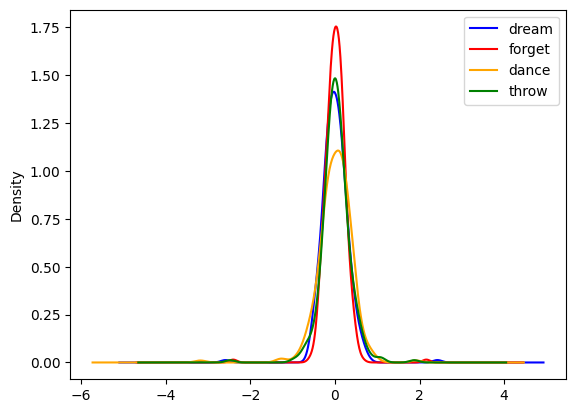

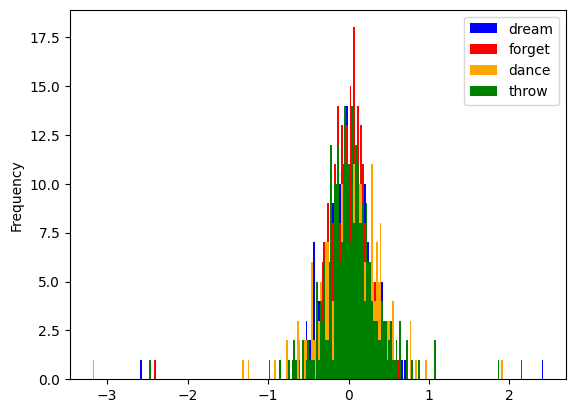

In [24]:
palabra1="dream"
palabra2="forget"
palabra3="dance"
palabra4="throw"
a=vocab_list[palabra1]
b=vocab_list[palabra2]
c=vocab_list[palabra3]
d=vocab_list[palabra4]
p1=pd.DataFrame(a,columns=[palabra1])
p2=pd.DataFrame(b,columns=[palabra2])
p3=pd.DataFrame(c,columns=[palabra3])
p4=pd.DataFrame(d,columns=[palabra4])
pd_juntos=pd.concat([p1,p2,p3,p4],axis=1)#.plot.hist()
pd_juntos.plot.density(color=["Blue","red","orange","green"])#    .dens.plot.hist()
pd_juntos.plot.hist(bins=256,color=["Blue","red","orange","green"])

In [25]:
p4

,throw
0,-0.055064
1,0.049359
2,-0.068745
3,-0.019568
4,-0.014070
...,...
295,-0.054321
296,-0.200490
297,0.074475
298,-0.007650


In [26]:
print(p4.max())
print(p4.min())

throw    1.8727
dtype: float32
throw   -2.4749
dtype: float32


<Axes: ylabel='Density'>

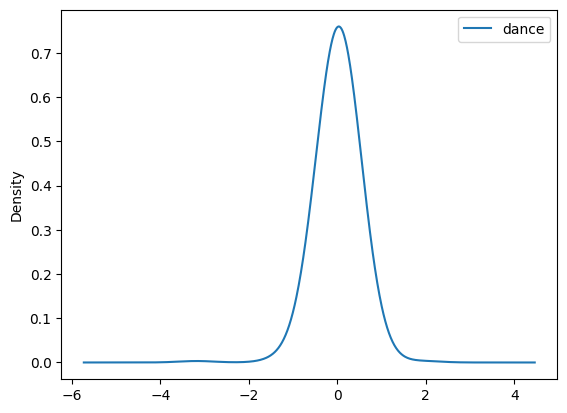

In [27]:
p3.plot.kde(bw_method=1) 

# distribuciones de sustantivos

<Axes: ylabel='Frequency'>

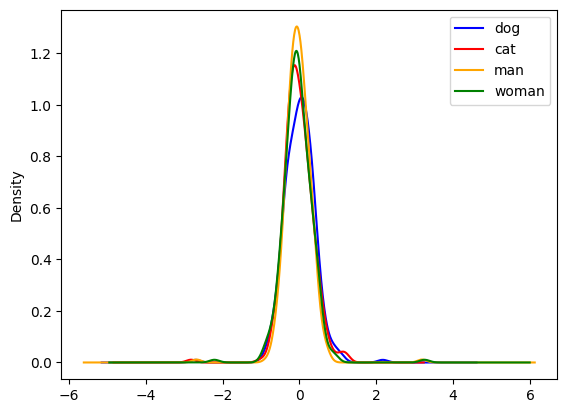

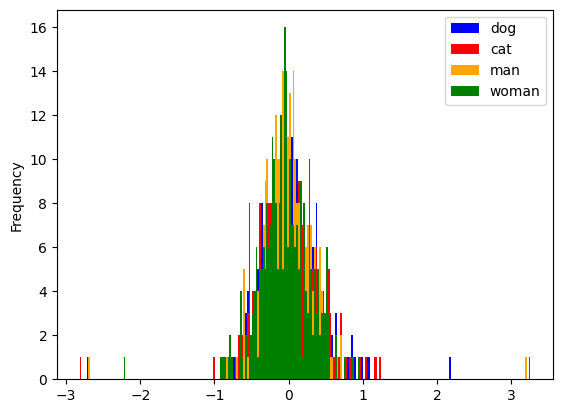

In [28]:
palabra1="dog"
palabra2="cat"
palabra3="man"
palabra4="woman"
a=vocab_list[palabra1]
b=vocab_list[palabra2]
c=vocab_list[palabra3]
d=vocab_list[palabra4]
p1=pd.DataFrame(a,columns=[palabra1])
p2=pd.DataFrame(b,columns=[palabra2])
p3=pd.DataFrame(c,columns=[palabra3])
p4=pd.DataFrame(d,columns=[palabra4])
pd_juntos=pd.concat([p1,p2,p3,p4],axis=1)#.plot.hist()
pd_juntos.plot.density(color=["Blue","red","orange","green"])#    .dens.plot.hist()
pd_juntos.plot.hist(bins=256,color=["Blue","red","orange","green"])

# distribuciones de adjetivos

<Axes: ylabel='Frequency'>

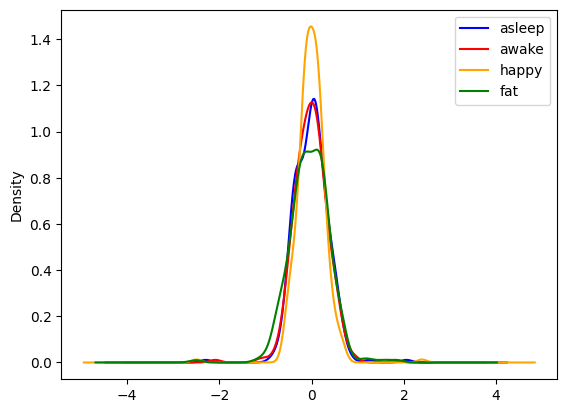

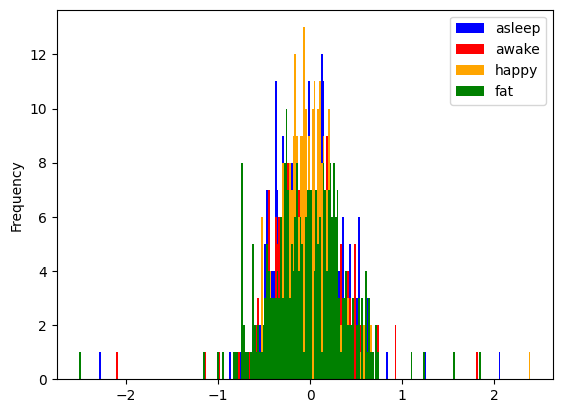

In [29]:
palabra1="asleep"
palabra2="awake"
palabra3="happy"
palabra4="fat"
a=vocab_list[palabra1]
b=vocab_list[palabra2]
c=vocab_list[palabra3]
d=vocab_list[palabra4]
p1=pd.DataFrame(a,columns=[palabra1])
p2=pd.DataFrame(b,columns=[palabra2])
p3=pd.DataFrame(c,columns=[palabra3])
p4=pd.DataFrame(d,columns=[palabra4])
pd_juntos=pd.concat([p1,p2,p3,p4],axis=1)#.plot.hist()
pd_juntos.plot.density(color=["Blue","red","orange","green"])#    .dens.plot.hist()
pd_juntos.plot.hist(bins=256,color=["Blue","red","orange","green"])

# distribucion de adv

<Axes: ylabel='Frequency'>

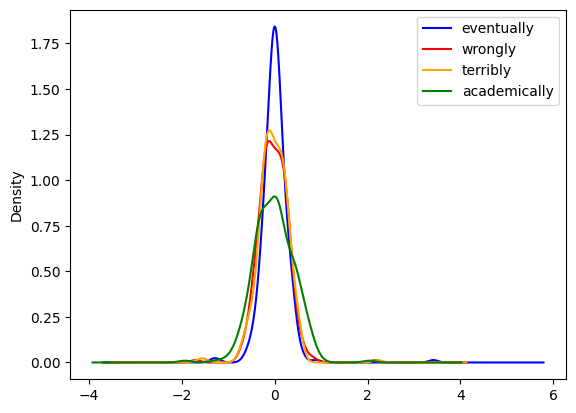

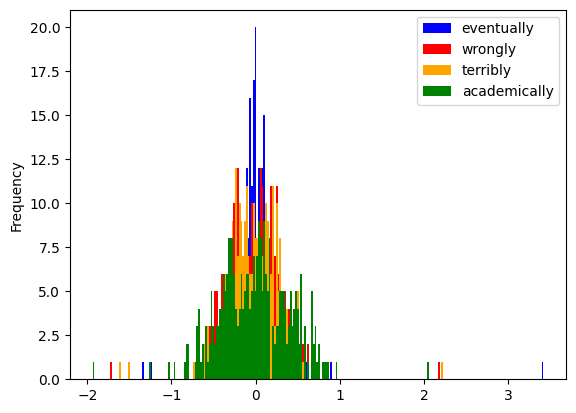

In [30]:
palabra1="eventually"
palabra2="wrongly"
palabra3="terribly"
palabra4="academically"
a=vocab_list[palabra1]
b=vocab_list[palabra2]
c=vocab_list[palabra3]
d=vocab_list[palabra4]
p1=pd.DataFrame(a,columns=[palabra1])
p2=pd.DataFrame(b,columns=[palabra2])
p3=pd.DataFrame(c,columns=[palabra3])
p4=pd.DataFrame(d,columns=[palabra4])
pd_juntos=pd.concat([p1,p2,p3,p4],axis=1)#.plot.hist()
pd_juntos.plot.density(color=["Blue","red","orange","green"])#    .dens.plot.hist()
pd_juntos.plot.hist(bins=256,color=["Blue","red","orange","green"])

# dibujar distribucion


In [31]:
a=vocab_list["blue"]
b=vocab_list["banded"]
c=vocab_list["hats"]
d=vocab_list["red"]
e=vocab_list["bandannas"]
f=vocab_list["colorful"]
g=vocab_list["together"]
h=vocab_list["dream"]

In [32]:
def normalizar(vec):
    norms = np.linalg.norm(vec, axis=-1, keepdims=True)
    norms = np.where(norms == 0, 1, norms)
    vec /= norms
    return vec

In [33]:
# a=normalizar(a)
# b=normalizar(b)
# c=normalizar(c)
# d=normalizar(d)

In [34]:
p1=pd.DataFrame(a,columns=["blue"])
p2=pd.DataFrame(b,columns=["banded"])
p3=pd.DataFrame(c,columns=["hats"])
p4=pd.DataFrame(d,columns=["red"])
p5=pd.DataFrame(e,columns=["bandannas"])
p6=pd.DataFrame(f,columns=["colorful"])
p7=pd.DataFrame(g,columns=["together"])
p8=pd.DataFrame(h,columns=["dream"])

<Axes: ylabel='Density'>

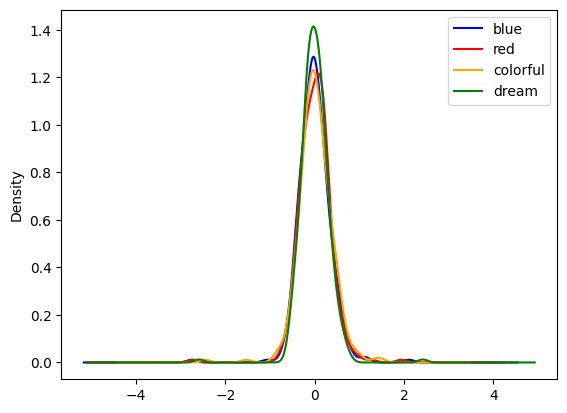

In [35]:
pd_juntos=pd.concat([p1,p4,p6,p8],axis=1)#.plot.hist()
pd_juntos.plot.density(color=["Blue","red","orange","green"])#    .dens.plot.hist()

<Axes: ylabel='Frequency'>

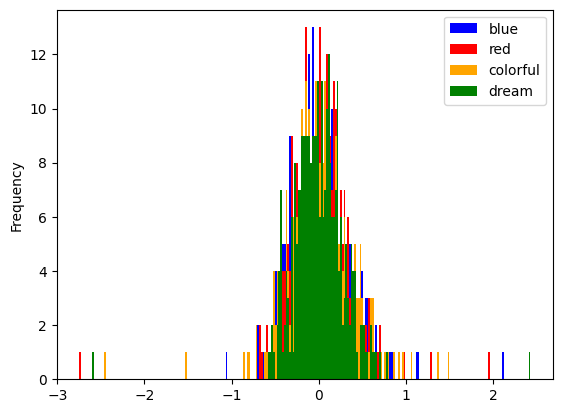

In [36]:
pd_juntos.plot.hist(bins=256,color=["Blue","red","orange","green"])

In [37]:
import matplotlib.pyplot as plt

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 array([-2.74530005e+00, -2.72511220e+00, -2.70492435e+00, -2.68473649e+00,
        -2.66454840e+00, -2.64436054e+00, -2.62417269e+00, -2.60398483e+00,
        -2.58379698e+00, -2.56360912e+00, -2.54342103e+00, -2.52323318e+00,
        -2.50304532e+00, -2.48285747e+00, -2.46266961e+00, -2.44248176e+00,
        -2.42229390e+00, -2.40210581e+00, -2.38191795e+00, -2.36173010e+00,
        -2.34154224e+00, -2.32135439e+00, -2.30116653e+00, -2.28097844e+00,
        -2.26079059e+00, -2.24060273e+00, -2.22041488e+00, -2.20022702e+00,
        -2.18003917e+00, -2.15985131e+00, -2.13966322e+00, -2.11947536e+00,
        -2.09928751e+00, -2.07909966e+00, -2.05891180e+00, -2.03872395e+00,
        -2.01853609e+00, -1.99834812e+00, -1.97816014e+00, -1.95797229e+00,
        -1.93778443e+00, -1.91759658e+00, -1.89740860e+00, -1.87722075e+00,
      

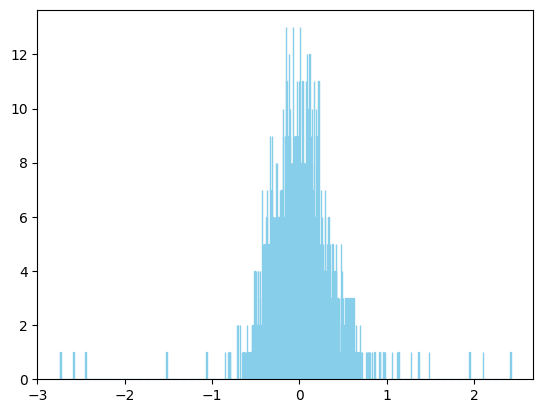

In [38]:
plt.hist(pd_juntos,bins=256, color = ["skyblue","red","orange","blue"], ec="skyblue")

In [39]:
EPS = np.finfo(float).eps
from scipy import ndimage

In [40]:
def mutual_information_2d(x, y, sigma=1, normalized=True):
    """
    Computes (normalized) mutual information between two 1D variate from a
    joint histogram.
    Parameters
    ----------
    x : 1D array
        first variable
    y : 1D array
        second variable
    sigma: float
        sigma for Gaussian smoothing of the joint histogram
    Returns
    -------
    nmi: float
        the computed similariy measure
    """
    bins = (256, 256)

    jh = np.histogram2d(x, y, bins=bins)[0]

    # smooth the jh with a gaussian filter of given sigma
    #ndimage.gaussian_filter(jh, sigma=sigma, mode='constant', output=jh)

    # compute marginal histograms
    jh = jh + EPS
    sh = np.sum(jh)
    jh = jh / sh
    s1 = np.sum(jh, axis=0).reshape((-1, jh.shape[0]))
    s2 = np.sum(jh, axis=1).reshape((jh.shape[1], -1))

    # Normalised Mutual Information of:
    # Studholme,  jhill & jhawkes (1998).
    # "A normalized entropy measure of 3-D medical image alignment".
    # in Proc. Medical Imaging 1998, vol. 3338, San Diego, CA, pp. 132-143.
    if normalized:
        mi = ((np.sum(s1 * np.log(s1)) + np.sum(s2 * np.log(s2))) /
              np.sum(jh * np.log(jh))) - 1
    else:    
        mi = (np.sum(jh * np.log(jh)) - np.sum(s1 * np.log(s1)) -
              np.sum(s2 * np.log(s2)))

    return mi

In [41]:
print(mutual_information_2d(a,b))
print(mutual_information_2d(a,c))
print(mutual_information_2d(b,c))

0.5267070685970117
0.4938237372886469
0.5921042122340381


In [42]:
print(mutual_information_2d(a,a))

0.9999999999996441


# mutual information


In [43]:
import warnings

import numpy as np
import numpy.linalg as la
from numpy import log
from scipy.special import digamma
from sklearn.neighbors import BallTree, KDTree


In [44]:
def add_noise(x, intens=1e-10):
    # small noise to break degeneracy, see doc.
    return x + intens * np.random.random_sample(x.shape)

In [45]:
def build_tree(points):
    if points.shape[1] >= 20:
        return BallTree(points, metric="chebyshev")
    return KDTree(points, metric="chebyshev")

In [46]:
def count_neighbors(tree, x, r):
    return tree.query_radius(x, r, count_only=True)

In [47]:
def avgdigamma(points, dvec):
    # This part finds number of neighbors in some radius in the marginal space
    # returns expectation value of <psi(nx)>
    tree = build_tree(points)
    dvec = dvec - 1e-15
    num_points = count_neighbors(tree, points, dvec)
    return np.mean(digamma(num_points))


In [48]:
def lnc_correction(tree, points, k, alpha):
    e = 0
    n_sample = points.shape[0]
    for point in points:
        # Find k-nearest neighbors in joint space, p=inf means max norm
        knn = tree.query(point[None, :], k=k + 1, return_distance=False)[0]
        knn_points = points[knn]
        # Substract mean of k-nearest neighbor points
        knn_points = knn_points - knn_points[0]
        # Calculate covariance matrix of k-nearest neighbor points, obtain eigen vectors
        covr = knn_points.T @ knn_points / k
        _, v = la.eig(covr)
        # Calculate PCA-bounding box using eigen vectors
        V_rect = np.log(np.abs(knn_points @ v).max(axis=0)).sum()
        # Calculate the volume of original box
        log_knn_dist = np.log(np.abs(knn_points).max(axis=0)).sum()

        # Perform local non-uniformity checking and update correction term
        if V_rect < log_knn_dist + np.log(alpha):
            e += (log_knn_dist - V_rect) / n_sample
    return e

In [49]:
def query_neighbors(tree, x, k):
    return tree.query(x, k=k + 1)[0][:, k]

In [50]:
def mi(x, y, z=None, k=3, base=2, alpha=0):
    """Mutual information of x and y (conditioned on z if z is not None)
    x, y should be a list of vectors, e.g. x = [[1.3], [3.7], [5.1], [2.4]]
    if x is a one-dimensional scalar and we have four samples
    """
    assert len(x) == len(y), "Arrays should have same length"
    assert k <= len(x) - 1, "Set k smaller than num. samples - 1"
    x, y = np.asarray(x), np.asarray(y)
    x, y = x.reshape(x.shape[0], -1), y.reshape(y.shape[0], -1)
    x = add_noise(x)
    y = add_noise(y)
    points = [x, y]
    if z is not None:
        z = np.asarray(z)
        z = z.reshape(z.shape[0], -1)
        points.append(z)
    points = np.hstack(points)
    # Find nearest neighbors in joint space, p=inf means max-norm
    tree = build_tree(points)
    dvec = query_neighbors(tree, points, k)
    if z is None:
        a, b, c, d = (
            avgdigamma(x, dvec),
            avgdigamma(y, dvec),
            digamma(k),
            digamma(len(x)),
        )
        if alpha > 0:
            d += lnc_correction(tree, points, k, alpha)
    else:
        xz = np.c_[x, z]
        yz = np.c_[y, z]
        a, b, c, d = (
            avgdigamma(xz, dvec),
            avgdigamma(yz, dvec),
            avgdigamma(z, dvec),
            digamma(k),
        )
    return (-a - b + c + d) / log(base)

In [51]:
a=vocab_list["run"]
b=vocab_list["sleep"]
c=vocab_list["rail"]

In [52]:
print("MI between two independent continuous random variables X and Y:")
print(mi(a, b, base=2, alpha=0))
print(mi(a, c, base=10, alpha=0))

MI between two independent continuous random variables X and Y:
-0.023603442985337075
0.00836565423842751


# Mutual information

In [53]:
import numpy as np
import matplotlib.pyplot as plot

In [54]:
def mutual_information_2d(x, y, sigma=1, normalized=True):
    """
    Computes (normalized) mutual information between two 1D variate from a
    joint histogram.
    Parameters
    ----------
    x : 1D array
        first variable
    y : 1D array
        second variable
    sigma: float
        sigma for Gaussian smoothing of the joint histogram
    Returns
    -------
    nmi: float
        the computed similariy measure
    """
    bins = (256, 256)

    jh = np.histogram2d(x, y, bins=bins)[0]
    plot.hist(jh)
    print("1",jh)
    # smooth the jh with a gaussian filter of given sigma
    #ndimage.gaussian_filter(jh, sigma=sigma, mode='constant', output=jh)

    # compute marginal histograms
    jh = jh + EPS
    print("2:",jh)
    sh = np.sum(jh)
    print("3:",sh)
    jh = jh / sh
    print("4:",jh)
    s1 = np.sum(jh, axis=0).reshape((-1, jh.shape[0]))
    s2 = np.sum(jh, axis=1).reshape((jh.shape[1], -1))

    # Normalised Mutual Information of:
    # Studholme,  jhill & jhawkes (1998).
    # "A normalized entropy measure of 3-D medical image alignment".
    # in Proc. Medical Imaging 1998, vol. 3338, San Diego, CA, pp. 132-143.
    if normalized: #[(H(X|Y) + H(Y|X)) / H(X,Y)]  -1
        mi = ((np.sum(s1 * np.log(s1)) + np.sum(s2 * np.log(s2))) /
              np.sum(jh * np.log(jh))) - 1
    else:
        mi = (np.sum(jh * np.log(jh)) - np.sum(s1 * np.log(s1)) -
              np.sum(s2 * np.log(s2)))

    return mi

In [55]:
EPS = np.finfo(float).eps

In [56]:
a=vocab_list["red"]
b=vocab_list["blue"]
c=vocab_list["colorful"]

Text(0, 0.5, 'colorful')

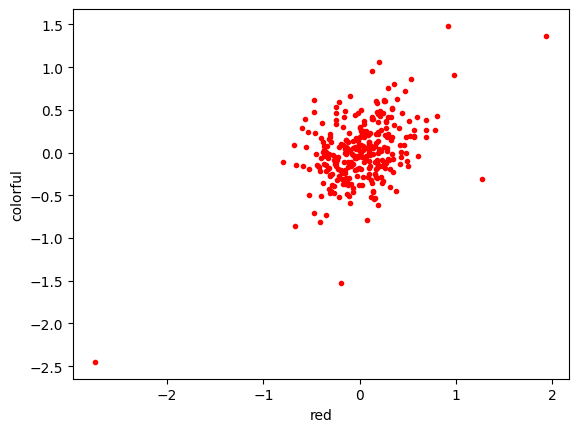

In [57]:
# plot data
fig1 = plt.figure()
plt.plot(a,c,'.r')
plt.xlabel('red')
plt.ylabel('colorful')

Text(0, 0.5, 'colorful')

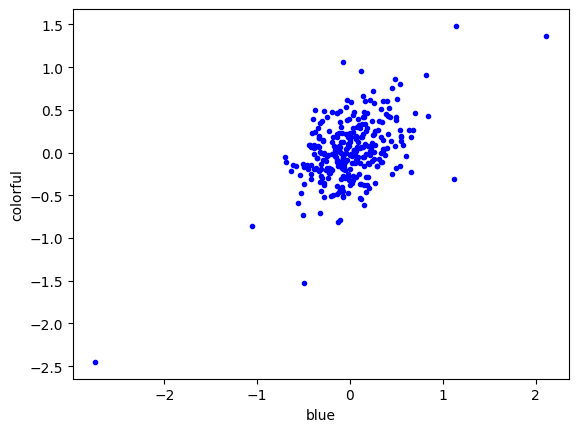

In [58]:
# plot data
fig1 = plt.figure()
plt.plot(b,c,'.b')
plt.xlabel('blue')
plt.ylabel('colorful')

Text(0, 0.5, 'blue')

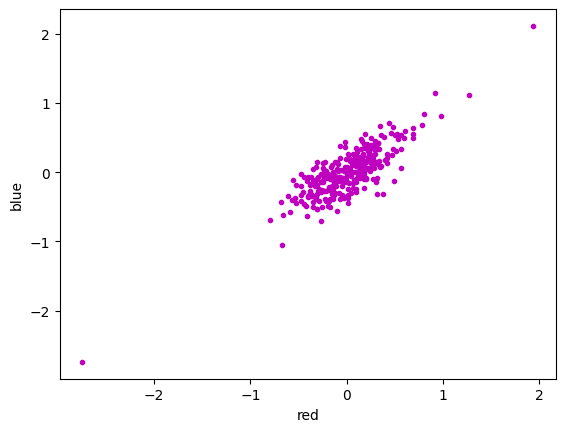

In [59]:
# plot data
fig1 = plt.figure()
plt.plot(a,b,'.m')
plt.xlabel('red')
plt.ylabel('blue')

1 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
2: [[1.00000000e+00 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 ...
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 1.00000000e+00]]
3: 300.00000000001444
4: [[3.33333333e-03 7.40148683e-19 7.40148683e-19 ... 7.40148683e-19
  7.40148683e-19 7.40148683e-19]
 [7.40148683e-19 7.40148683e-19 7.40148683e-19 ... 7.40148683e-19
  7.40148683e-19 7.40148683e-19]
 [7.40148683e-19

0.4478487300146343

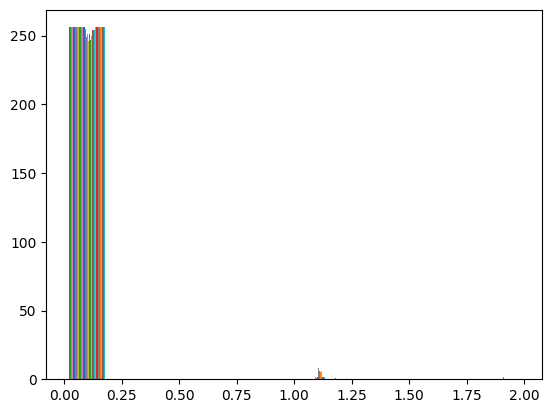

In [60]:
mutual_information_2d(a,b)

In [61]:
x=vocab_list["colorful"]
y=vocab_list["appropriate"]

Text(0, 0.5, 'y')

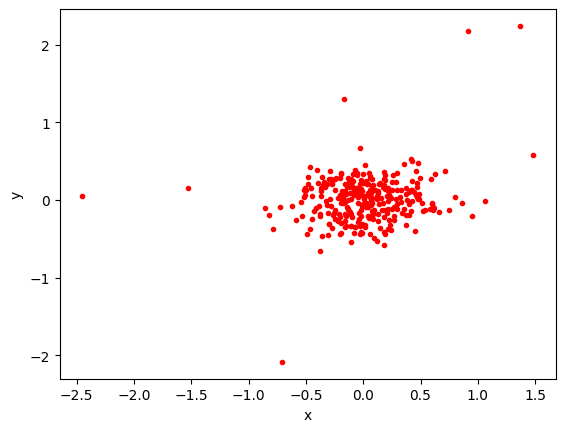

In [62]:
# plot data
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')

1 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2: [[2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 ...
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]]
3: 300.00000000001455
4: [[7.40148683e-19 7.40148683e-19 7.40148683e-19 ... 7.40148683e-19
  7.40148683e-19 7.40148683e-19]
 [7.40148683e-19 7.40148683e-19 7.40148683e-19 ... 7.40148683e-19
  7.40148683e-19 7.40148683e-19]
 [7.40148683e-19

0.45076203517920943

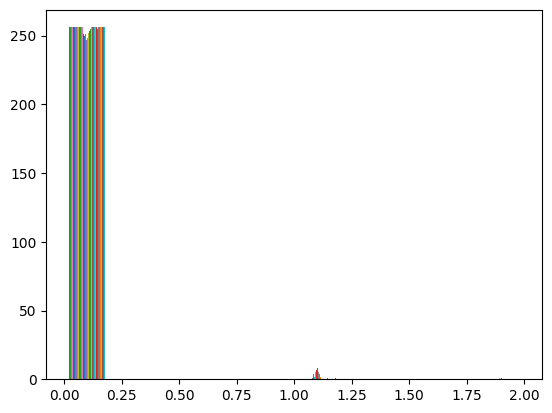

In [63]:
mutual_information_2d(x,y)

In [64]:
m=vocab_list["fish"]
p=vocab_list["dog"]

Text(0, 0.5, 'dog')

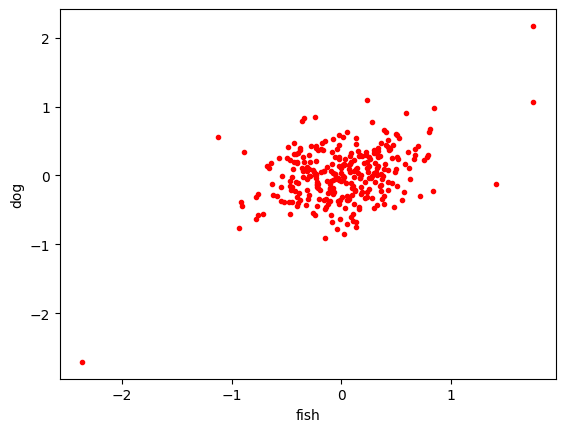

In [65]:
# plot data
fig1 = plt.figure()
plt.plot(m,p,'.r')
plt.xlabel('fish')
plt.ylabel('dog')

1 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
2: [[1.00000000e+00 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 ...
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 ... 2.22044605e-16
  2.22044605e-16 1.00000000e+00]]
3: 300.00000000001444
4: [[3.33333333e-03 7.40148683e-19 7.40148683e-19 ... 7.40148683e-19
  7.40148683e-19 7.40148683e-19]
 [7.40148683e-19 7.40148683e-19 7.40148683e-19 ... 7.40148683e-19
  7.40148683e-19 7.40148683e-19]
 [7.40148683e-19

0.5164327284257186

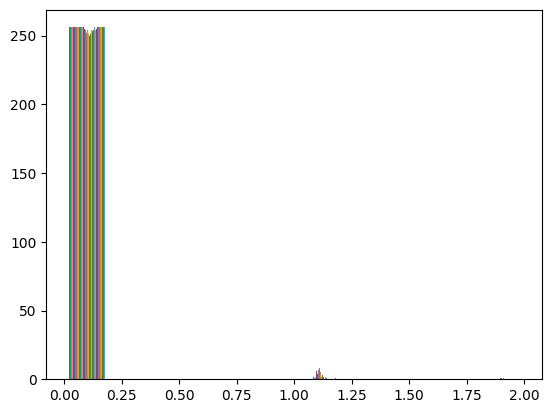

In [66]:
mutual_information_2d(m,p)